# 7 methods to perform Time Series forecasting (with Python codes)

Gurchetan Singh, Febrary 8, 2018. [hERE](https://www.analyticsvidhya.com/blog/2018/02/time-series-forecasting-methods/)

## Table of Contents
- Understanding the Problem Statement and Dataset
- Method 1 – Start with a Naive Approach
- Method 2 – Simple average
- Method 3 – Moving average
- Method 4 – Single Exponential smoothing
- Method 5 – Holt’s linear trend method
- Method 6 – Holt’s Winter seasonal method
- Method 7 – ARIMA

### Understanding the Problem Statement and Dataset

We are provided with a Time Series problem involving prediction of number of commuters of JetRail, a new high speed rail service by Unicorn Investors. We are provided with 2 years of data(**Aug 2012-Sept 2014**) and using this data we have to forecast the number of commuters for next 7 months.

TSAnalysis-JetRail-Train.csv
TSAnalysis-JetRail-Test.csv

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# import data
df = pd.read_csv('.\\data\TSAnalysis-JetRail-Train.csv')

df.head(5)

,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2


In [3]:
df.tail()

,ID,Datetime,Count
18283,18283,25-09-2014 19:00,868
18284,18284,25-09-2014 20:00,732
18285,18285,25-09-2014 21:00,702
18286,18286,25-09-2014 22:00,580
18287,18287,25-09-2014 23:00,534


As seen from the print statements above, we are given 2 years of data(2012-2014) at hourly level with the number of commuters travelling and we need to estimate the number of commuters for future.

- Subsetting the dataset from (August 2012 – Dec 2013)
- Creating train and test file for modeling. The first 14 months (August 2012 – October 2013) are used as training data and next 2 months (Nov 2013 – Dec 2013) as testing data.
- Aggregating the dataset at daily basis

In [4]:
# subsetting dataset
# index 11856 mark the end of the year 2013

df = pd.read_csv('.\\data\TSAnalysis-JetRail-Train.csv', nrows = 11856)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11856 entries, 0 to 11855
Data columns (total 3 columns):
ID          11856 non-null int64
Datetime    11856 non-null object
Count       11856 non-null int64
dtypes: int64(2), object(1)
memory usage: 278.0+ KB


In [5]:
df.tail()

,ID,Datetime,Count
11851,11851,31-12-2013 19:00,286
11852,11852,31-12-2013 20:00,256
11853,11853,31-12-2013 21:00,228
11854,11854,31-12-2013 22:00,216
11855,11855,31-12-2013 23:00,246


In [6]:
# Creating train and test set 
# Index 10392 marks the end of October 2013 

In [7]:
train = df[0:10392] # 10392 [0:10391]
test =df[10932:] # 924 [10392:11855]

In [8]:
# Aggregating the dataset at daily level


In [9]:
df.Timestamp = pd.to_datetime(df.Datetime, format='%d-%m-%Y %H:%M') 
df.head(5)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2


In [10]:
df.index = df.Timestamp 
df.head()

,ID,Datetime,Count
Datetime,,,
2012-08-25 00:00:00,0,25-08-2012 00:00,8
2012-08-25 01:00:00,1,25-08-2012 01:00,2
2012-08-25 02:00:00,2,25-08-2012 02:00,6
2012-08-25 03:00:00,3,25-08-2012 03:00,2
2012-08-25 04:00:00,4,25-08-2012 04:00,2


In [11]:
df = df.resample('D').mean()
df.head()

,ID,Count
Datetime,,
2012-08-25,11.5,3.166667
2012-08-26,35.5,3.666667
2012-08-27,59.5,2.583333
2012-08-28,83.5,2.416667
2012-08-29,107.5,2.500000


In [14]:
train.Timestamp = pd.to_datetime(train.Datetime, format='%d-%m-%Y %H:%M') 
train.index = train.Timestamp 
train = train.resample('D').mean()
train.head()

,ID,Count
Datetime,,
2012-08-25,11.5,3.166667
2012-08-26,35.5,3.666667
2012-08-27,59.5,2.583333
2012-08-28,83.5,2.416667
2012-08-29,107.5,2.500000


In [15]:
test.Timestamp = pd.to_datetime(test.Datetime, format='%d-%m-%Y %H:%M') 
test.index = test.Timestamp 
test = test.resample('D').mean()
test.head()

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


,ID,Count
Datetime,,
2013-11-23,10937.5,92.166667
2013-11-24,10955.5,127.750000
2013-11-25,10979.5,136.500000
2013-11-26,11003.5,198.666667
2013-11-27,11027.5,180.166667


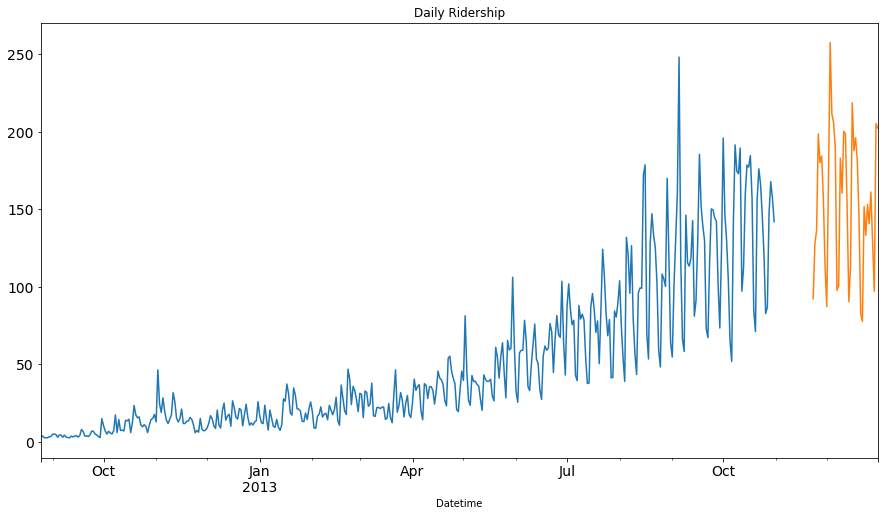

In [16]:
# Plotting data
train.Count.plot(figsize=(15,8), title= 'Daily Ridership', fontsize=14)
test.Count.plot(figsize=(15,8), title= 'Daily Ridership', fontsize=14)
plt.show()

### Method 1: Start with a Naive Approach

Such forecasting technique which assumes that the next expected point is equal to the last observed point is called Naive Method.

In [31]:
dd = np.asarray(train.Count)
y_hat = test.copy()
y_hat['naive'] = dd[len(dd)-1]
y_hat.head(5)

,ID,Count,naive
Datetime,,,
2013-11-23,10937.5,92.166667,142.0
2013-11-24,10955.5,127.750000,142.0
2013-11-25,10979.5,136.500000,142.0
2013-11-26,11003.5,198.666667,142.0
2013-11-27,11027.5,180.166667,142.0


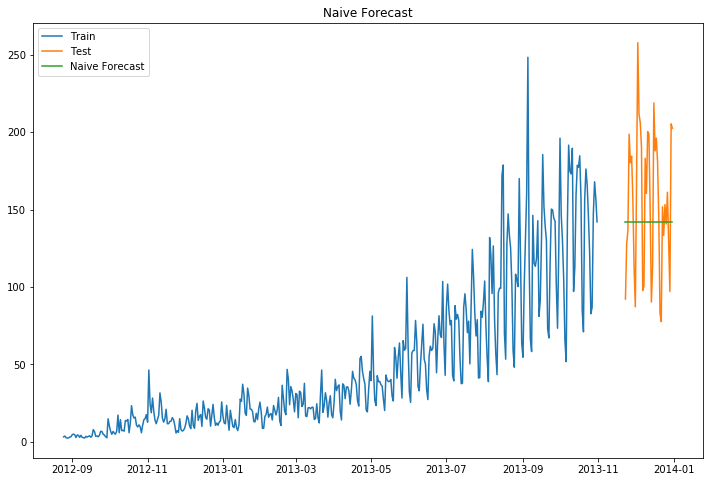

In [32]:
plt.figure(figsize=(12,8))
plt.plot(train.index, train['Count'], label='Train')
plt.plot(test.index, test['Count'], label='Test')
plt.plot(y_hat.index, y_hat['naive'], label='Naive Forecast')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.show()

In [33]:
# calculate RMSE to check to accuracy
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(test.Count, y_hat.naive))
print(rms)

46.73435643319667


We can infer from the RMSE value and the graph above, that Naive method isn’t suited for datasets with high variability. It is **best suited for stable datasets**.

### Method 2: – Simple Average

Such forecasting technique which forecasts the expected value equal to the average of all previously observed points is called Simple Average technique.

In [36]:
y_hat_avg = test.copy()
y_hat_avg['avg_forecast'] = train['Count'].mean()
y_hat_avg.head()

,ID,Count,avg_forecast
Datetime,,,
2013-11-23,10937.5,92.166667,48.333718
2013-11-24,10955.5,127.750000,48.333718
2013-11-25,10979.5,136.500000,48.333718
2013-11-26,11003.5,198.666667,48.333718
2013-11-27,11027.5,180.166667,48.333718


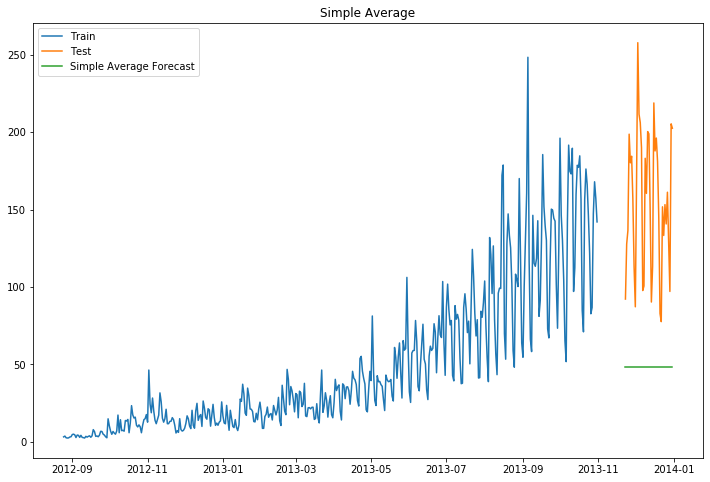

In [39]:
plt.figure(figsize=(12,8))
plt.plot(train.index, train['Count'], label='Train')
plt.plot(test.index, test['Count'], label='Test')
plt.plot(y_hat_avg.index, y_hat_avg['avg_forecast'], label='Simple Average Forecast')
plt.legend(loc='best')
plt.title("Simple Average")
plt.show()

In [40]:
rms = sqrt(mean_squared_error(test.Count, y_hat_avg.avg_forecast))
print(rms)

116.21392176807676


Hence we can infer from the score that this method **works best when the average at each time period remains constant**.

### Method 3 – Moving Average

Forecasting technique which uses window of time period for calculating the average is called Moving Average technique. Calculation of the moving average involves what is sometimes called a “**sliding window**” of size n.

Using a simple moving average model, we forecast the next value(s) in a time series based on the average of a fixed finite number ‘p’ of the previous values. Thus, for all i > p

In [41]:
y_hat_avg = test.copy()

# chose the data of last 2 months only )60=
y_hat_avg['moving_avg_forecast'] = train['Count'].rolling(60).mean().iloc[-1]

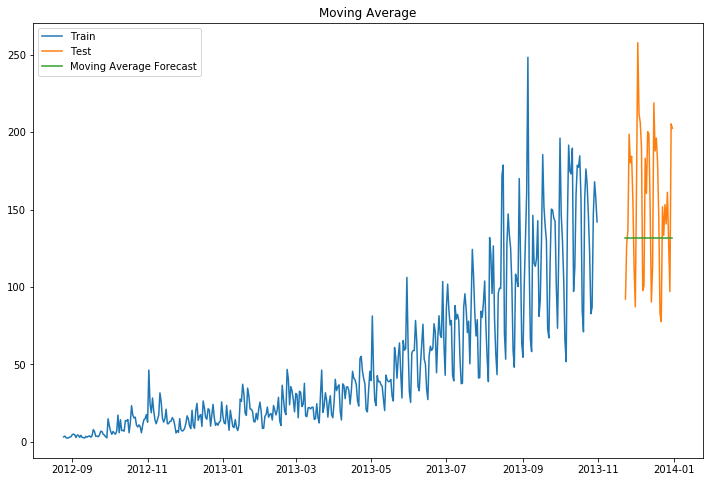

In [42]:
plt.figure(figsize=(12,8))
plt.plot(train.index, train['Count'], label='Train')
plt.plot(test.index, test['Count'], label='Test')
plt.plot(y_hat_avg.index, y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast')
plt.legend(loc='best')
plt.title("Moving Average")
plt.show()

In [43]:
rms = sqrt(mean_squared_error(test.Count, y_hat_avg.moving_avg_forecast))
print(rms)

50.67035821665728


An advancement over Moving average method is **Weighted moving average method**. In the Moving average method as seen above, we equally weigh the past ‘n’ observations. But we might encounter situations where each of the observation from the past ‘n’ impacts the forecast in a different way. Such a technique which weighs the past observations differently is called Weighted Moving Average technique.

A weighted moving average is a moving average where within the sliding window values are given different weights, typically so that more recent points matter more.

Instead of selecting a window size, it requires a list of weights (which should add up to 1). For example if we pick [0.40, 0.25, 0.20, 0.15] as weights, we would be giving 40%, 25%, 20% and 15% to the last 4 points respectively.

### Method 4 – Simple Exponential Smoothing

Forecasts are calculated using weighted averages where the weights decrease exponentially as observations come from further in the past, the smallest weights are associated with the oldest observations: where 0≤ α ≤1 is the smoothing parameter.

The forecast at time t+1 is equal to a weighted average between the most recent observation yt and the most recent forecast ŷ t|t−1.

In [44]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
y_hat_avg = test.copy()
fit2 = SimpleExpSmoothing(np.asarray(train['Count'])).fit(smoothing_level=0.6,optimized=False)
y_hat_avg['SES'] = fit2.forecast(len(test))

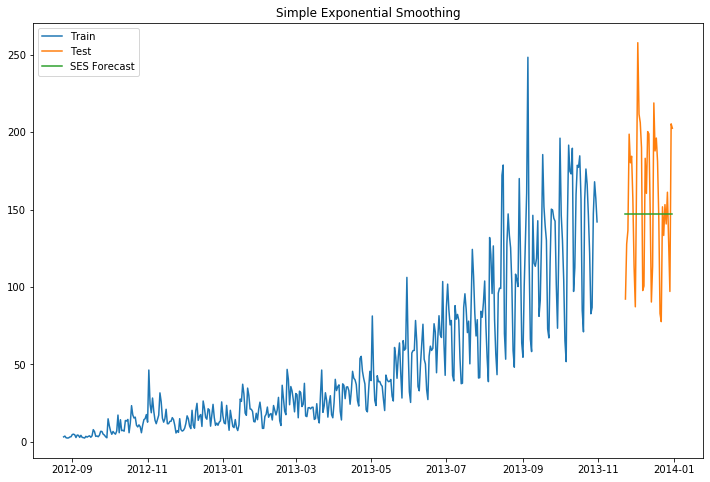

In [45]:
plt.figure(figsize=(12,8))
plt.plot(train.index, train['Count'], label='Train')
plt.plot(test.index, test['Count'], label='Test')
plt.plot(y_hat_avg.index, y_hat_avg['SES'], label='SES Forecast')
plt.legend(loc='best')
plt.title("Simple Exponential Smoothing")
plt.show()

In [46]:
rms = sqrt(mean_squared_error(test.Count, y_hat_avg.SES))
print(rms)

45.51086222166109


We can see that implementing Simple exponential model with alpha as 0.6 generates a better model till now. We can tune the parameter using the validation set to generate even a better Simple exponential model.

### Method 5 – Holt’s Linear Trend method

If we use any of the above methods, it won’t **take into account this trend**. Trend is the general pattern of prices that we observe over a period of time. In this case we can see that there is an increasing trend.

But we need a method that can map the trend accurately without any assumptions. Such a method that takes into account the trend of the dataset is called Holt’s Linear Trend method.

Each Time series dataset can be decomposed into it’s componenets which are Trend, Seasonality and Residual. Any dataset that follows a trend can use Holt’s linear trend method for forecasting.

<Figure size 1080x576 with 0 Axes>

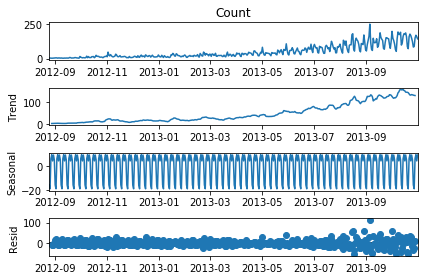

In [50]:
import statsmodels.api as sm
plt.figure(figsize=(15,8))
sm.tsa.seasonal_decompose(train.Count).plot()
result = sm.tsa.stattools.adfuller(train.Count)
plt.show()

We can see from the graphs obtained that this dataset follows an increasing trend. Hence we can use Holt’s linear trend to forecast the future prices.

**Holt extended simple exponential smoothing to allow forecasting of data with a trend. It is nothing more than exponential smoothing applied to both level(the average value in the series) and trend**.

We can also generate a multiplicative forecast equation by multiplying trend and level instead of adding it. When the **trend increases or decreases linearly**, `additive equation` is used whereas when the **trend increases of decreases exponentially**, `multiplicative equation` is used. 
Practice shows that **multiplicative is a more stable predictor, the additive method however is simpler to understand**.

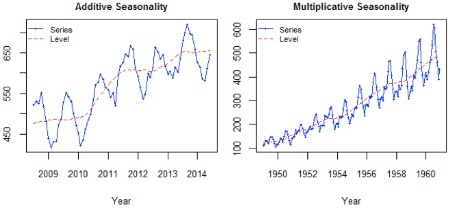

In [51]:
y_hat_avg = test.copy()

fit1 = Holt(np.asarray(train['Count'])).fit(smoothing_level = 0.3, smoothing_slope = 0.1)
y_hat_avg['Holt_linear'] = fit1.forecast(len(test))

C:\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


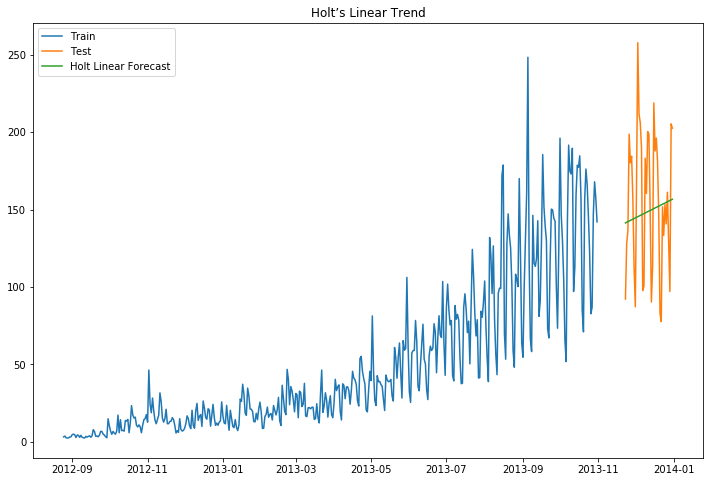

In [52]:
plt.figure(figsize=(12,8))
plt.plot(train.index, train['Count'], label='Train')
plt.plot(test.index, test['Count'], label='Test')
plt.plot(y_hat_avg.index, y_hat_avg['Holt_linear'], label='Holt Linear Forecast')
plt.legend(loc='best')
plt.title("Holt’s Linear Trend")
plt.show()

In [53]:
rms = sqrt(mean_squared_error(test.Count, y_hat_avg.Holt_linear))
print(rms)

45.63096797659178


We can see that this method **maps the trend accurately** and hence provides a better solution when compared with above models.

### Method 6 – Holt-Winters Method

So let’s introduce a new term which will be used in this algorithm. Consider a hotel located on a hill station. It experiences high visits during the summer season whereas the visitors during the rest of the year are comparatively very less. Hence the profit earned by the owner will be far better in summer season than in any other season. This pattern will repeat itself every year. Such a repetition is called Seasonality. **Datasets which show a similar set of pattern after fixed intervals of a time period suffer from seasonality**.

The above mentioned models don’t take into account the seasonality of the dataset while forecasting. Hence we need a method that takes into account both trend and seasonality to forecast future prices. One such algorithm that we can use in such a scenario is Holt’s Winter method. **The idea behind triple exponential smoothing(Holt’s Winter) is to apply exponential smoothing to the seasonal components in addition to level and trend**.

Note. level(the average value in the series).

The level equation shows a weighted average between the seasonally adjusted observation and the non-seasonal forecast for time t. The trend equation is identical to Holt’s linear method. The seasonal equation shows a weighted average between the current seasonal index, and the seasonal index of the same season last year (i.e., s time periods ago).

In this method also, we can implement both additive and multiplicative technique.  The `additive method` is preferred **when the seasonal variations are roughly constant through the series**, while the `multiplicative method` is preferred **when the seasonal variations are changing proportional to the level of the series**.

In [54]:
y_hat_avg = test.copy()
# seasonal_period = 7 as data repeats itself weekly.
fit1 = ExponentialSmoothing(np.asarray(train['Count']) ,seasonal_periods=7 , trend='add', seasonal='add',).fit()
y_hat_avg['Holt_Winter'] = fit1.forecast(len(test))

C:\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


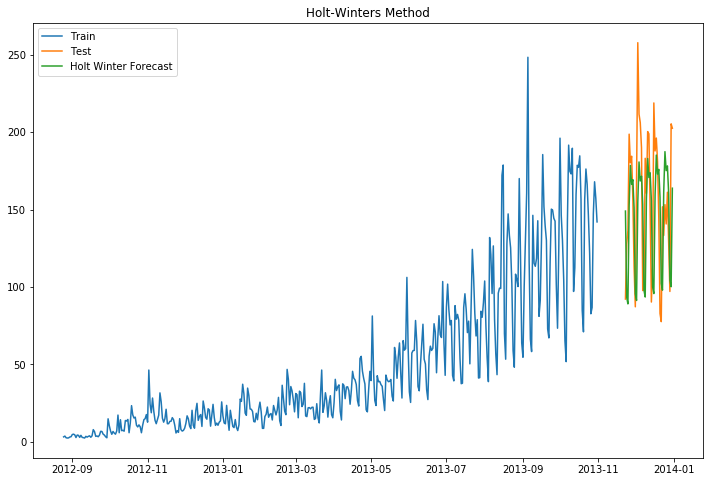

In [55]:
plt.figure(figsize=(12,8))
plt.plot(train.index, train['Count'], label='Train')
plt.plot(test.index, test['Count'], label='Test')
plt.plot(y_hat_avg.index, y_hat_avg['Holt_Winter'], label='Holt Winter Forecast')
plt.legend(loc='best')
plt.title("Holt-Winters Method")
plt.show()

In [56]:
rms = sqrt(mean_squared_error(test.Count, y_hat_avg.Holt_Winter))
print(rms)

48.20437591470091


### Method 7 – ARIMA

Another common Time series model that is very popular among the Data scientists is ARIMA. It stand for `Autoregressive Integrated Moving` average. **While exponential smoothing models were based on a description of trend and seasonality in the data, ARIMA models aim to describe the correlations in the data with each other**. An improvement over ARIMA is Seasonal ARIMA. It takes into account the seasonality of dataset just like Holt’ Winter method.

In [57]:
y_hat_avg = test.copy()
fit1 = sm.tsa.statespace.SARIMAX(train.Count, order=(2, 1, 4), seasonal_order=(0, 1, 1, 7)).fit()
y_hat_avg['SARIMA'] = fit1.predict(start="2013-11-1", end="2013-12-31", dynamic=True)

C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


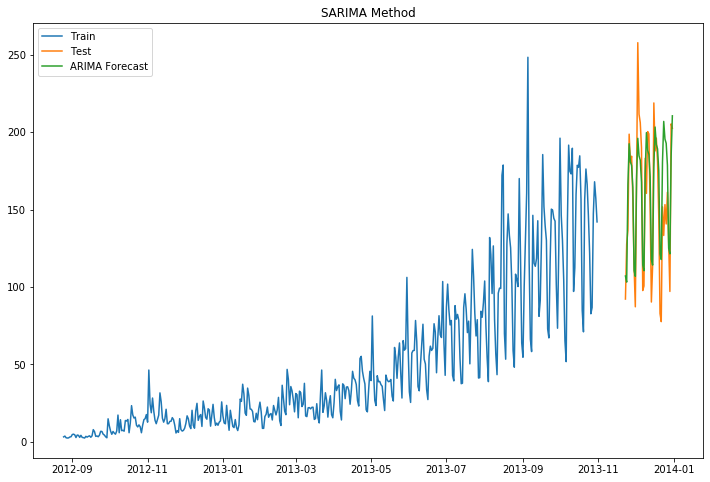

In [58]:
plt.figure(figsize=(12,8))
plt.plot(train.index, train['Count'], label='Train')
plt.plot(test.index, test['Count'], label='Test')
plt.plot(y_hat_avg.index, y_hat_avg['SARIMA'], label='ARIMA Forecast')
plt.legend(loc='best')
plt.title("SARIMA Method")
plt.show()

In [59]:
rms = sqrt(mean_squared_error(test.Count, y_hat_avg.SARIMA))
print(rms)

27.55918869290573
